In [ ]:
!gdown --id texto

##Data Preprocessing

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from time import time
import numpy as np

In [ ]:
datos=pd.read_excel("Data - CC CC.xlsx", sheet_name='SE 01-09-21 CON CABECERAS')
df = pd.DataFrame(datos)
df.head(2)

,DATE,HOUR,AC CURRENT,AC VOLTAJE,AC POWER,AC FRECUENCY,AC APARENT POWER,AC REACTIVE POWER,AC POWER FACTOR,DC CURRENT,DC VOLTAGE,DC POWER
0,4/09/2021,06:00:27,0.65,218.2,81.97,59.981,143.86,118.23,56.97,0.247,370.1,91.47
1,4/09/2021,06:00:54,0.66,217.7,88.12,59.974,140.50,112.46,59.94,0.231,370.2,85.51


In [ ]:
df.drop(['DATE'], axis='columns', inplace=True)
df.drop(['HOUR'], axis='columns', inplace=True)
df.drop(['AC POWER FACTOR'], axis='columns', inplace=True)
df.head(2)

,AC CURRENT,AC VOLTAJE,AC POWER,AC FRECUENCY,AC APARENT POWER,AC REACTIVE POWER,DC CURRENT,DC VOLTAGE,DC POWER
0,0.65,218.2,81.97,59.981,143.86,118.23,0.247,370.1,91.47
1,0.66,217.7,88.12,59.974,140.50,112.46,0.231,370.2,85.51


In [ ]:
descripcion=df.describe()
descripcion.to_excel("/content/drive/Othercomputers/Mi Portátil/Papers/Panel Solar - Ing. Saul/Paneles Nuevos 2021/RFE-CC-descripcion.xlsx")

##OLS

In [ ]:
X = df.drop ("AC POWER", 1) #Feature Matrix 
y = df ["AC POWER"] #Target Variable

Porcentaje=0.20
Semilla = 44
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=Porcentaje, random_state=Semilla)
#Defino el algoritmo a utilizar
regr = linear_model.LinearRegression()
#Entreno el modelo
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print("###########################")
print('Score - Test del modelo: Mínimos Cuadrados')
print(regr.score(X_test, y_test))
print("###########################")

from sklearn import metrics

y_pred_cuadra = regr.predict(X_test)
r_cuadra = metrics.mean_absolute_error(y_test, y_pred_cuadra)

print('MAE del modelo:Minimos cuadrados')
print(r_cuadra)

print("###########################")

r2_cuadra = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cuadra))

print('MSE del modelo:Minimos Cuadrados')
print(r2_cuadra)

print("###########################")

modelo_r2_cuadra = metrics.r2_score(y_test, y_pred_cuadra)

print('Coef. Determinacion del modelo:Minimos Cuadrados')
print(modelo_r2_cuadra)

modelo_r2_ajustada_cuadra =1-(1-modelo_r2_cuadra)*(len(y)-1)/(len(y)-X.shape[1]-1)

print("###########################")
print('Coef. Determinacion Ajustado del modelo:Minimos Cuadrados')
print(modelo_r2_ajustada_cuadra)

print("###########################")
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE - LinearRegression')
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)

###########################
Score - Test del modelo: Mínimos Cuadrados
0.9999353467112397
###########################
MAE del modelo:Minimos cuadrados
4.21155133395433
###########################
MSE del modelo:Minimos Cuadrados
8.77227535829964
###########################
Coef. Determinacion del modelo:Minimos Cuadrados
0.9999353467112397
###########################
Coef. Determinacion Ajustado del modelo:Minimos Cuadrados
0.9999352439238173
###########################
DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE - LinearRegression
Valor de las pendientes o coeficientes "a":
[ 4.56883182e+01  1.57976130e+00 -1.15721484e+00  2.24060833e-01
  4.52685101e-02 -3.33755215e+00 -9.36013521e-02  5.71671771e-01]
Valor de la intersección o coeficiente "b":
-258.0901368608595


In [ ]:
from datetime import datetime

#Defino el algoritmo a utilizar
regr = linear_model.LinearRegression()
#Entreno el modelo

inicialOLS = datetime.now()
regr.fit(X_train, y_train)
finalOLS = datetime.now()
tiempoOLS = finalOLS - inicialOLS # Devuelve un objeto timedelta
print ("El tiempo de entranmiento-OLS es: ",tiempoOLS)

#############################################################

pred_inicialOLS = datetime.now()
Y_pred_OLS = regr.predict(X_test)
pred_finalOLS = datetime.now()
pred_tiempoOLS = pred_finalOLS - pred_inicialOLS # Devuelve un objeto timedelta
print ("El tiempo de test-OLS es: ",pred_tiempoOLS)

El tiempo de entranmiento-OLS es:  0:00:00.002644
El tiempo de test-OLS es:  0:00:00.001208


##RFE

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import linear_model
from time import time
import numpy as np

datos=pd.read_excel("Data - CC CC.xlsx", sheet_name='SE 01-09-21 CON CABECERAS')
df = pd.DataFrame(datos)
df.drop(['DATE'], axis='columns', inplace=True)
df.drop(['HOUR'], axis='columns', inplace=True)
df.drop(['AC POWER FACTOR'], axis='columns', inplace=True)

import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

X = df.drop ("AC POWER", 1) #Feature Matrix 
y = df ["AC POWER"] #Target Variable

#######################################
#no of features
nof_list=np.arange(1,8)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
#########################################
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 7)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Optimum number of features: 7
Score with 7 features: 0.999954
Index(['AC CURRENT', 'AC VOLTAJE', 'AC FRECUENCY', 'AC APARENT POWER',
       'DC CURRENT', 'DC VOLTAGE', 'DC POWER'],
      dtype='object')


##RFE-Models Regression

###Run Model

In [ ]:
datos=pd.read_excel("Data - CC CC.xlsx", sheet_name='SE 01-09-21 CON CABECERAS')
df = pd.DataFrame(datos)
df.drop(['DATE'], axis='columns', inplace=True)
df.drop(['HOUR'], axis='columns', inplace=True)
df.drop(['AC POWER FACTOR'], axis='columns', inplace=True)

X_multiple = df[['AC CURRENT', 'AC VOLTAJE', 'AC FRECUENCY', 'AC APARENT POWER',
                 'DC CURRENT', 'DC VOLTAGE', 'DC POWER']] #Feature Matrix 
y_multiple = df["AC POWER"] #Target Variable

Porcentaje=0.20
Semilla = 44
from sklearn.model_selection import train_test_split
#Separo los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple,
                                                    test_size=Porcentaje,
                                                    random_state=Semilla)
#Defino el algoritmo a utilizar
reg = linear_model.BayesianRidge()
regr = linear_model.LinearRegression()
regr2 = linear_model.Lasso()
regr3 = linear_model.Ridge()
#Entreno el modelo
reg.fit(X_train, y_train)
regr.fit(X_train, y_train)
regr2.fit(X_train, y_train)
regr3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 885487.6922489639, tolerance: 484822.14837113
  positive)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
print('Score - Test del modelo:Bayesian')
print(reg.score(X_test, y_test))
print('Score - Test del modelo:Mínimos Cuadrados')
print(regr.score(X_test, y_test))
print('Score - Test del modelo:Lasso')
print(regr2.score(X_test, y_test))
print('Score - Test del modelo:Ridge')
print(regr3.score(X_test, y_test))
print("###########################")

from sklearn import metrics

y_pred_bay = reg.predict(X_test)
r_bay = metrics.mean_absolute_error(y_test, y_pred_bay)

y_pred_cuadra = regr.predict(X_test)
r_cuadra = metrics.mean_absolute_error(y_test, y_pred_cuadra)

y_pred_lasso = regr2.predict(X_test)
r_lasso = metrics.mean_absolute_error(y_test, y_pred_lasso)

y_pred_ridge = regr3.predict(X_test)
r_ridge = metrics.mean_absolute_error(y_test, y_pred_ridge)

print('MAE del modelo:Bayesian')
print(r_bay)
print('MAE del modelo:Minimos cuadrados')
print(r_cuadra)
print('MAE del modelo:Lasso')
print(r_lasso)
print('MAE del modelo:Ridge')
print(r_ridge)
print("###########################")

r2_bay = np.sqrt(metrics.mean_squared_error(y_test, y_pred_bay))
r2_cuadra = np.sqrt(metrics.mean_squared_error(y_test, y_pred_cuadra))
r2_lasso = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lasso))
r2_ridge = np.sqrt(metrics.mean_squared_error(y_test, y_pred_ridge))

print('MSE del modelo:Bayesian')
print(r2_bay)
print('MSE del modelo:Minimos Cuadrados')
print(r2_cuadra)
print('MSE del modelo:Minimos Lasso')
print(r2_lasso)
print('MSE del modelo:Minimos Ridge')
print(r2_ridge)
print("###########################")

modelo_r2_bay = metrics.r2_score(y_test, y_pred_bay)
modelo_r2_cuadra = metrics.r2_score(y_test, y_pred_cuadra)
modelo_r2_lasso = metrics.r2_score(y_test, y_pred_lasso)
modelo_r2_ridge = metrics.r2_score(y_test, y_pred_ridge)

print('Coef. Determinacion del modelo:Bayesian')
print(modelo_r2_bay)
print('Coef. Determinacion del modelo:Minimos Cuadrados')
print(modelo_r2_cuadra)
print('Coef. Determinacion del modelo:Minimos Lasso')
print(modelo_r2_lasso)
print('Coef. Determinacion del modelo:Minimos Ridge')
print(modelo_r2_ridge)

modelo_r2_ajustada_bay =1-(1-modelo_r2_bay)*(len(y_multiple)-1)/(len(y_multiple)-X_multiple.shape[1]-1)
modelo_r2_ajustada_cuadra =1-(1-modelo_r2_cuadra)*(len(y_multiple)-1)/(len(y_multiple)-X_multiple.shape[1]-1)
modelo_r2_ajustada_lasso =1-(1-modelo_r2_lasso)*(len(y_multiple)-1)/(len(y_multiple)-X_multiple.shape[1]-1)
modelo_r2_ajustada_ridge =1-(1-modelo_r2_ridge)*(len(y_multiple)-1)/(len(y_multiple)-X_multiple.shape[1]-1)

print("###########################")
print('Coef. Determinacion Ajustado del modelo:Bayesian')
print(modelo_r2_ajustada_bay)
print('Coef. Determinacion Ajustado del modelo:Minimos Cuadrados')
print(modelo_r2_ajustada_cuadra)
print('Coef. Determinacion Ajustado del modelo:Minimos Lasso')
print(modelo_r2_ajustada_lasso)
print('Coef. Determinacion Ajustado del modelo:Minimos Ridge')
print(modelo_r2_ajustada_ridge)

print("###########################")
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE - BAYESIANO')
print('Valor de las pendientes o coeficientes "a":')
print(reg.coef_)
print('Valor de la intersección o coeficiente "b":')
print(reg.intercept_)
print("###########################")
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE - LinearRegression')
print('Valor de las pendientes o coeficientes "a":')
print(regr.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr.intercept_)
print("###########################")
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE - LASSO')
print('Valor de las pendientes o coeficientes "a":')
print(regr2.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr2.intercept_)
print("###########################")
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE - RIDGE')
print('Valor de las pendientes o coeficientes "a":')
print(regr3.coef_)
print('Valor de la intersección o coeficiente "b":')
print(regr3.intercept_) 
print("###########################")

Score - Test del modelo:Bayesian
0.9999346662629057
Score - Test del modelo:Mínimos Cuadrados
0.9999347470306268
Score - Test del modelo:Lasso
0.9998847622990278
Score - Test del modelo:Ridge
0.9999343268559897
###########################
MAE del modelo:Bayesian
4.246182852154009
MAE del modelo:Minimos cuadrados
4.251575667064928
MAE del modelo:Lasso
8.0996474855603
MAE del modelo:Ridge
4.225703244505412
###########################
MSE del modelo:Bayesian
8.818316765214105
MSE del modelo:Minimos Cuadrados
8.812864332540709
MSE del modelo:Minimos Lasso
11.711546243933105
MSE del modelo:Minimos Ridge
8.841192547018666
###########################
Coef. Determinacion del modelo:Bayesian
0.9999346662629058
Coef. Determinacion del modelo:Minimos Cuadrados
0.9999347470306268
Coef. Determinacion del modelo:Minimos Lasso
0.9998847622990278
Coef. Determinacion del modelo:Minimos Ridge
0.9999343268559897
###########################
Coef. Determinacion Ajustado del modelo:Bayesian
0.99993457539539

###Linealidad

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


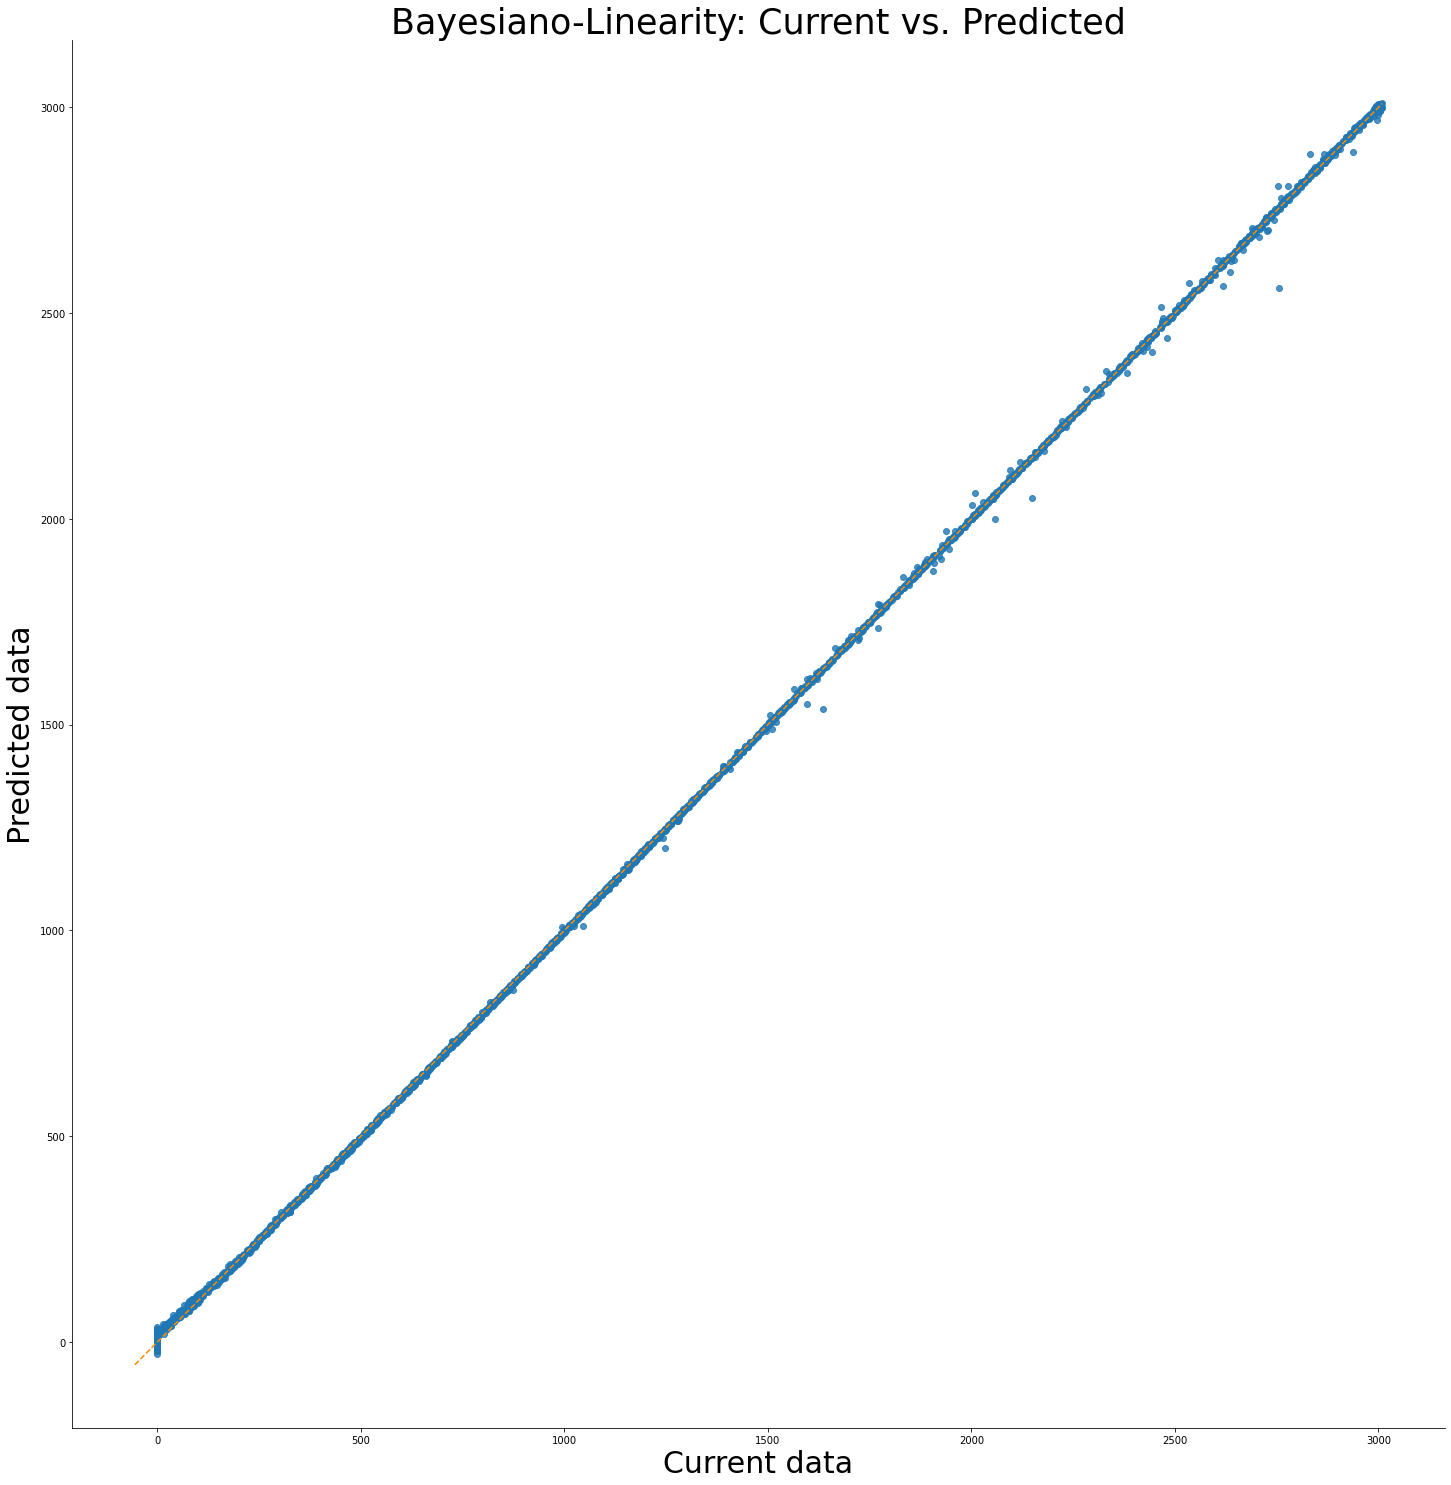

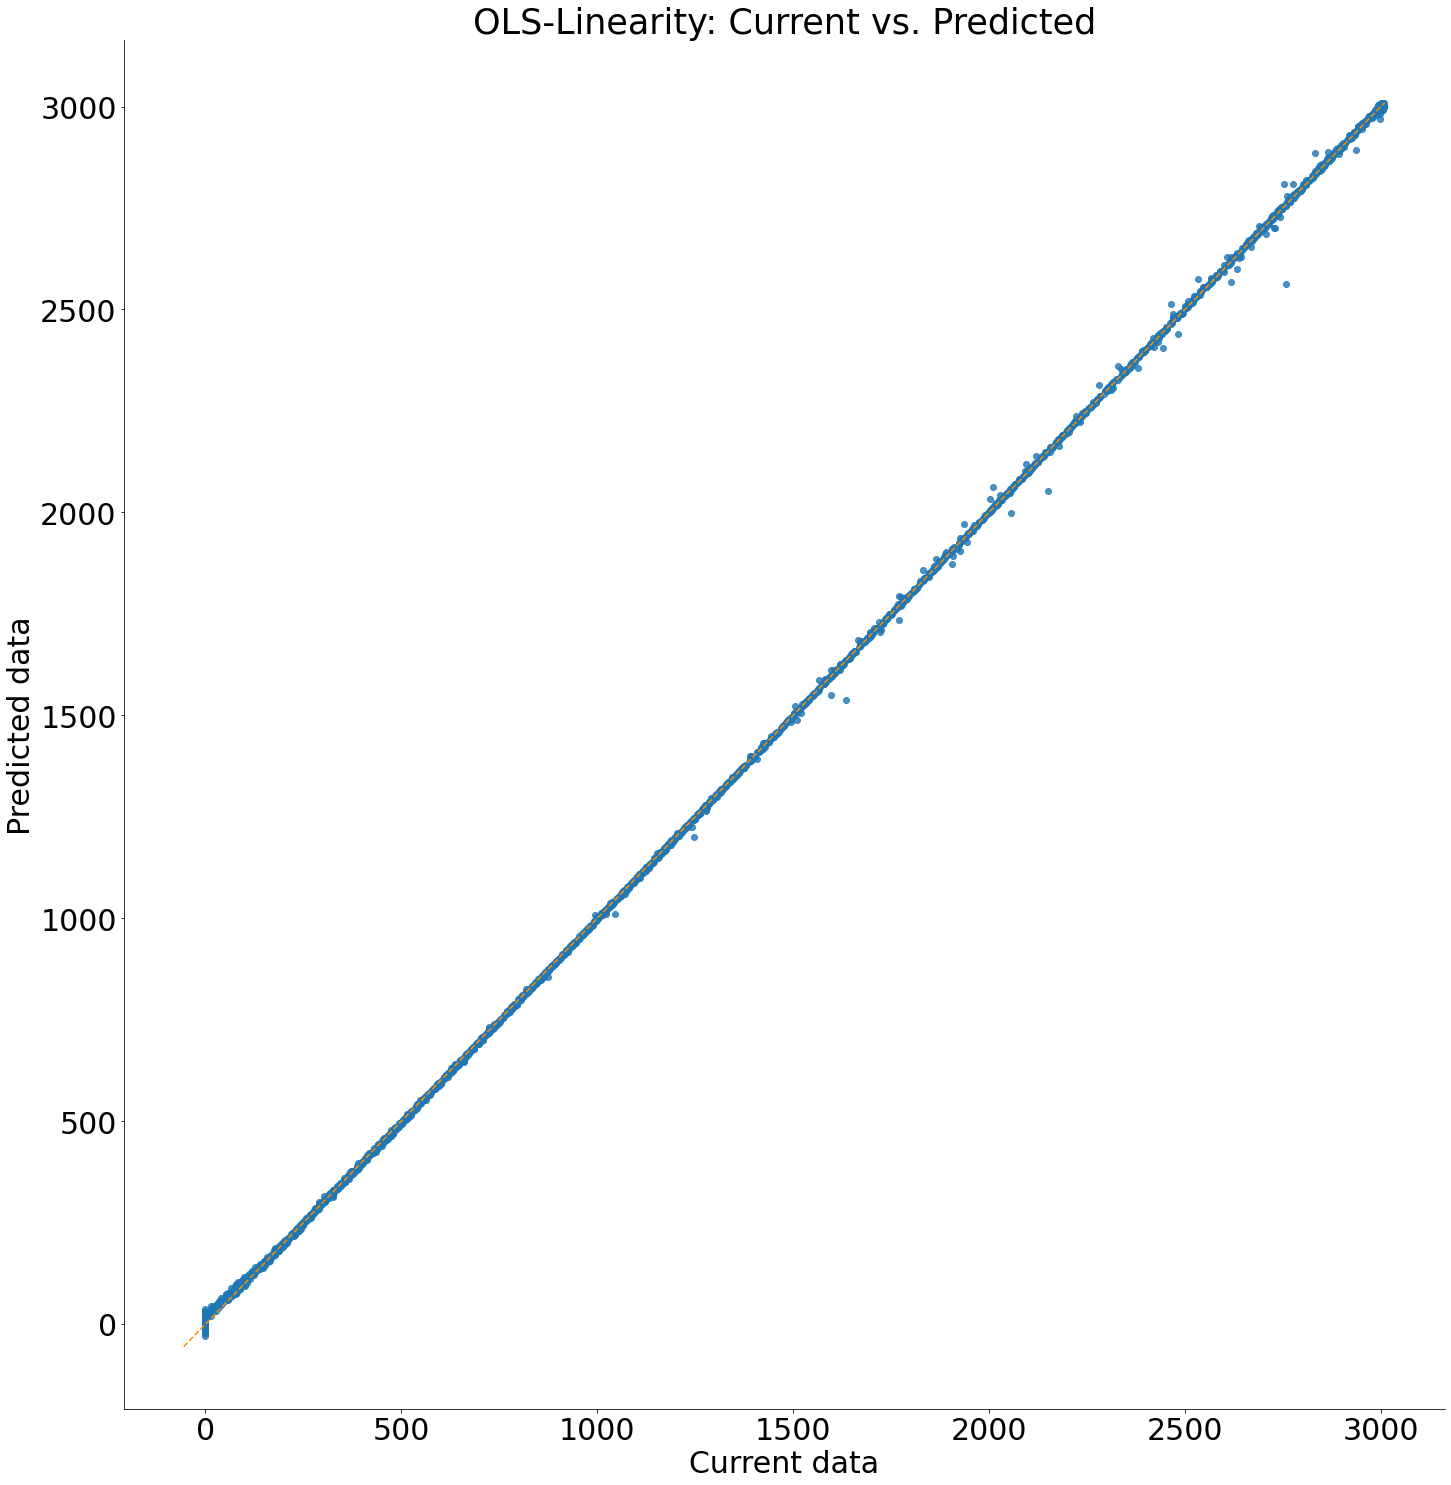

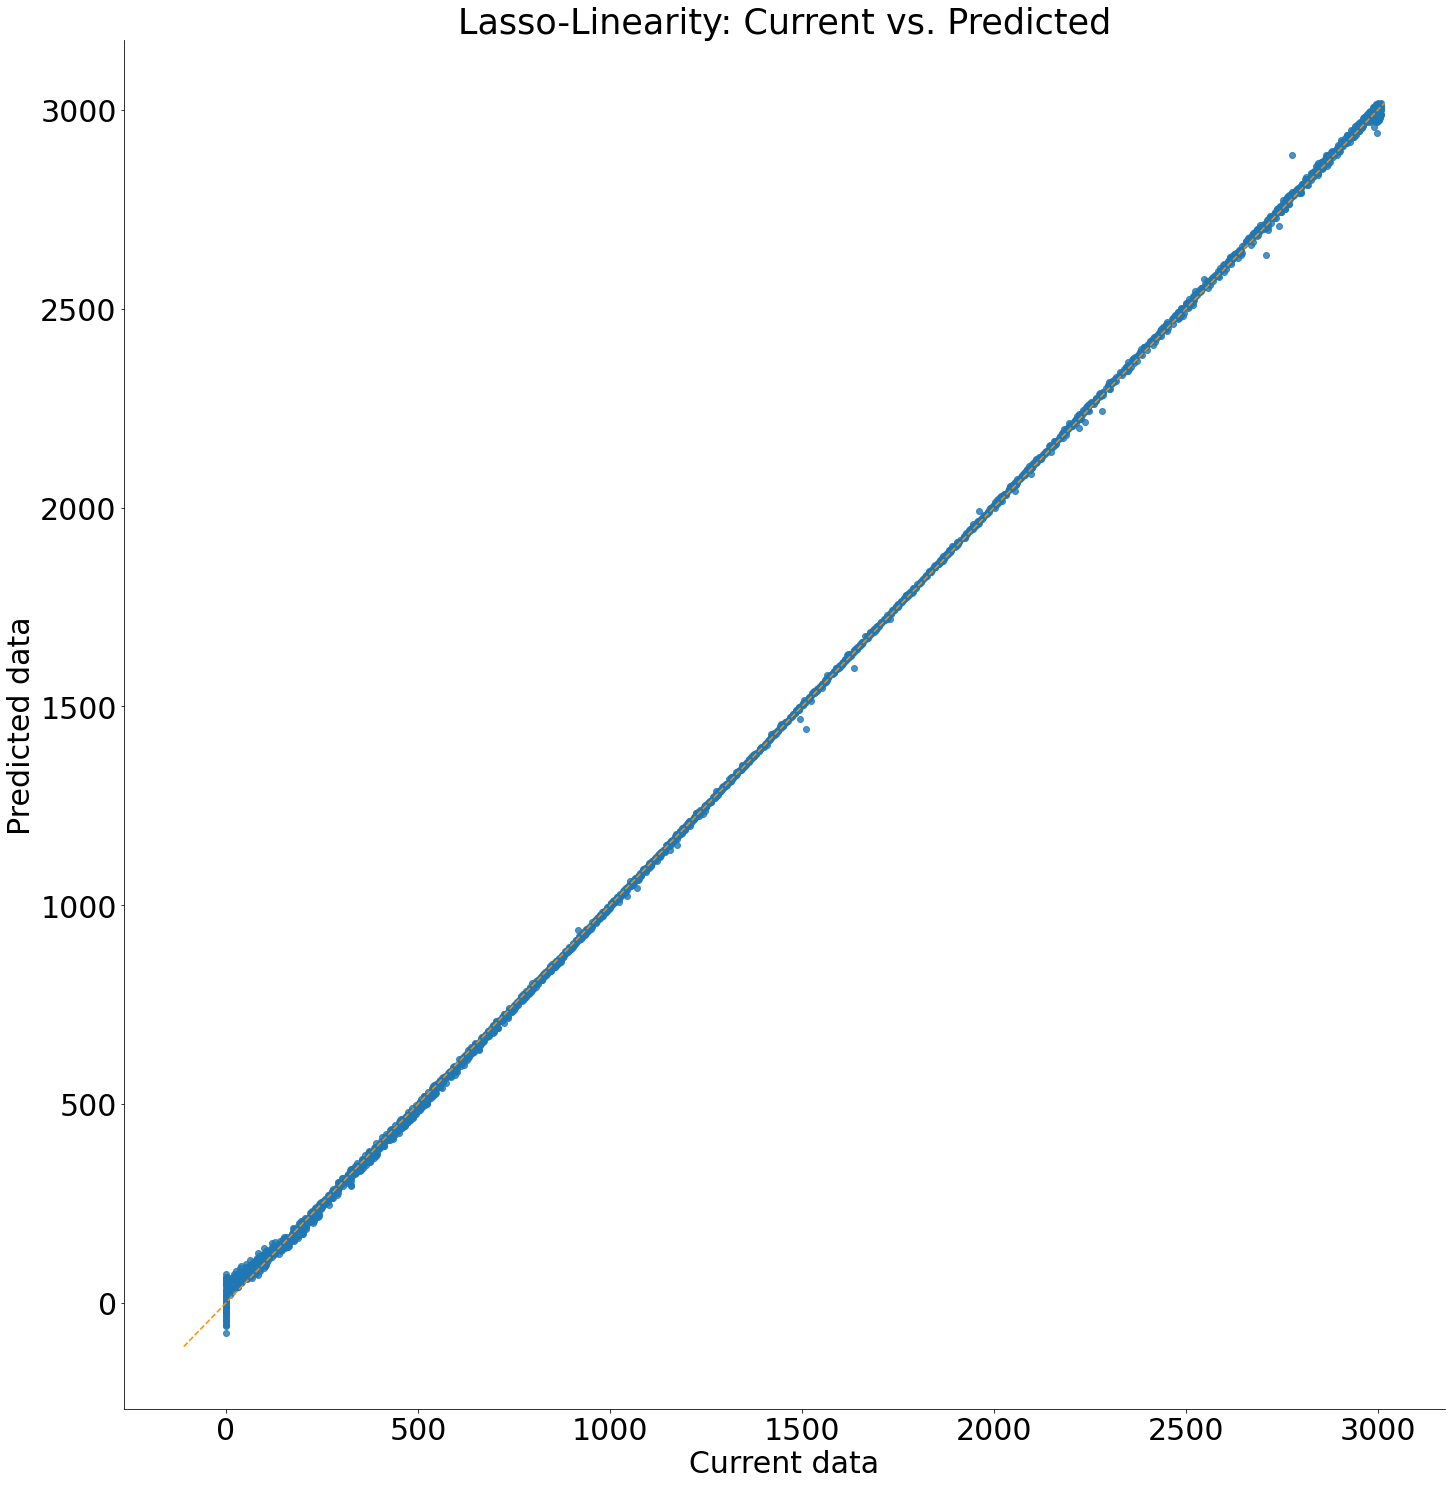

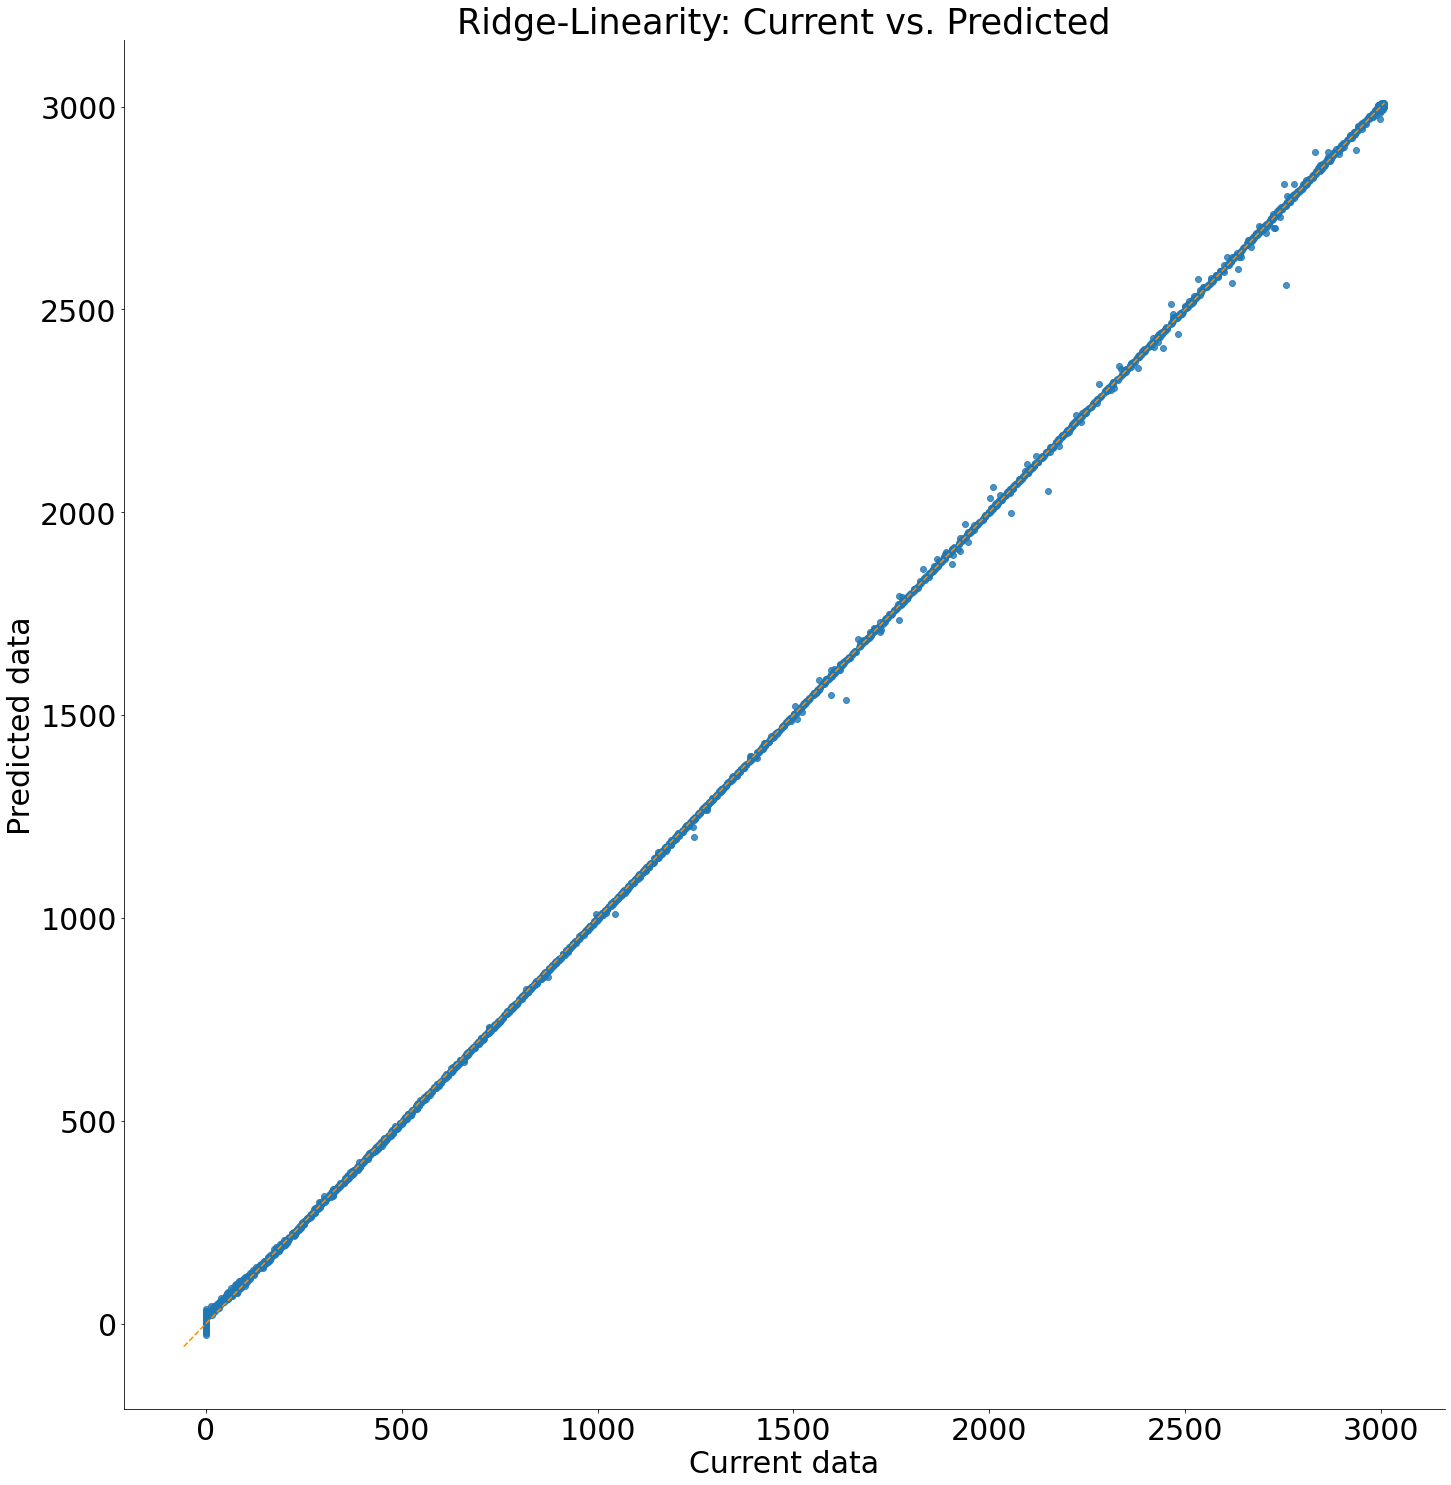

In [ ]:
import seaborn as sns
import time

def calculate_residuals(model, features, label):
    """
    Creates predictions on the features with the model and calculates residuals
    """
    predictions = model.predict(features)
    df_results = pd.DataFrame({'Actual': label, 'Predicted': predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

def linear_assumption(model, features, label, titulo1):
    """
    Linearity: Assumes that there is a linear relationship between the predictors and
               the response variable. If not, either a quadratic term or another
               algorithm should be used.
    """
    '''
    print('Assumption 1: Linear Relationship between the Target and the Feature', '\n')
        
    print('Checking with a scatter plot of actual vs. predicted.',
           'Predictions should follow the diagonal line.')
    '''
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)
    # Plotting the actual vs predicted values
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=20)
        
    # Plotting the diagonal line
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    plt.xlabel("Current data", fontsize=30)
    #plt.xlabel("Datos actuales", fontsize=30)
    plt.ylabel("Predicted data", fontsize=30)
    #plt.ylabel("Datos pronosticados", fontsize=30)
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title(titulo1, size = 35)
    #plt.show()
    titulo1_img="/content/drive/Othercomputers/Mi Portátil/Papers/Panel Solar - Ing. Saul/Paneles Nuevos 2021/CC-CC/RFE-"+titulo1+".png"
    plt.savefig(titulo1_img, bbox_inches='tight')


calculate_residuals(reg, X_train, y_train)
linear_assumption(reg, X_train, y_train, "Bayesiano-Linearity: Current vs. Predicted")
#linear_assumption(reg, X_train, y_train, "Bayesiano-Linealidad: Actual vs. Predicho")
time.sleep(1)
calculate_residuals(regr, X_train, y_train)
linear_assumption(regr, X_train, y_train, "OLS-Linearity: Current vs. Predicted")
#linear_assumption(regr, X_train, y_train, "OLS-Linealidad: Actual vs. Predicho")
time.sleep(1)
calculate_residuals(regr2, X_train, y_train)
linear_assumption(regr2, X_train, y_train, "Lasso-Linearity: Current vs. Predicted")
#linear_assumption(regr2, X_train, y_train, "Lasso-Linealidad: Actual vs. Predicho")
time.sleep(1)
calculate_residuals(regr3, X_train, y_train)
linear_assumption(regr3, X_train, y_train, "Ridge-Linearity: Current vs. Predicted")
#linear_assumption(regr3, X_train, y_train, "Ridge-Linealidad: Actual vs. Predicho")

###Normality of the Error Terms

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Los residuos no se distribuyen normalmente:  Bayesiano-Distribution of Residuals


/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Los residuos no se distribuyen normalmente:  OLS-Distribution of Residuals
Los residuos no se distribuyen normalmente:  Lasso-Distribution of Residuals


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/_adnorm.py:67: RuntimeWarning: divide by zero encountered in log
  S = np.sum((2*i[sl1]-1.0)/N*(np.log(z)+np.log(1-z[sl2])), axis=axis)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Los residuos no se distribuyen normalmente:  Ridge-Distribution of Residuals


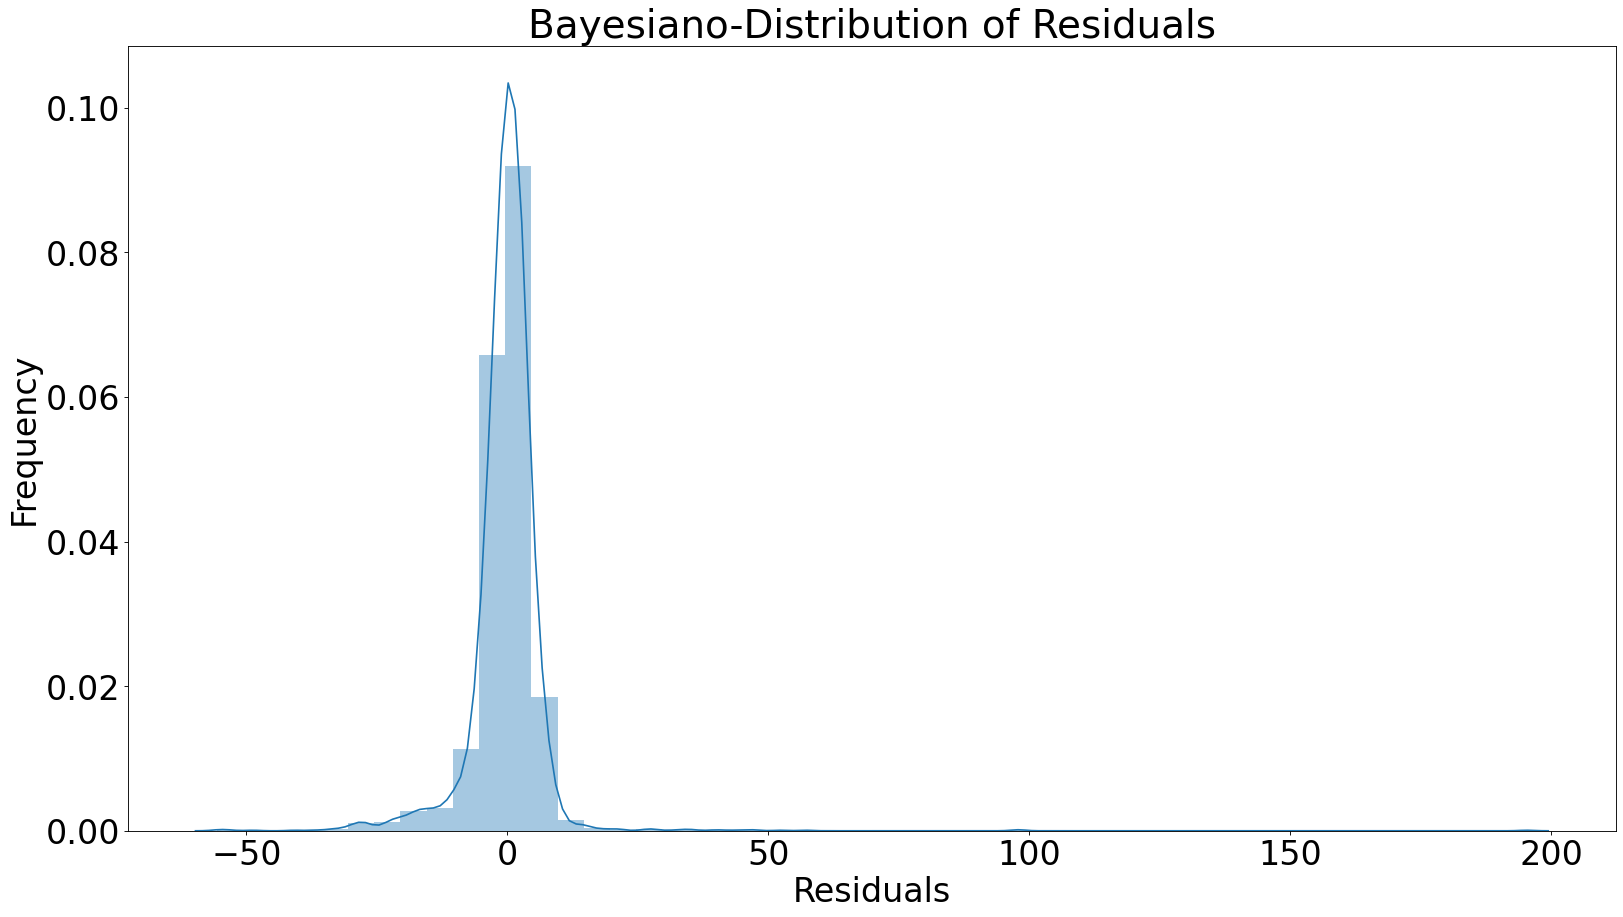

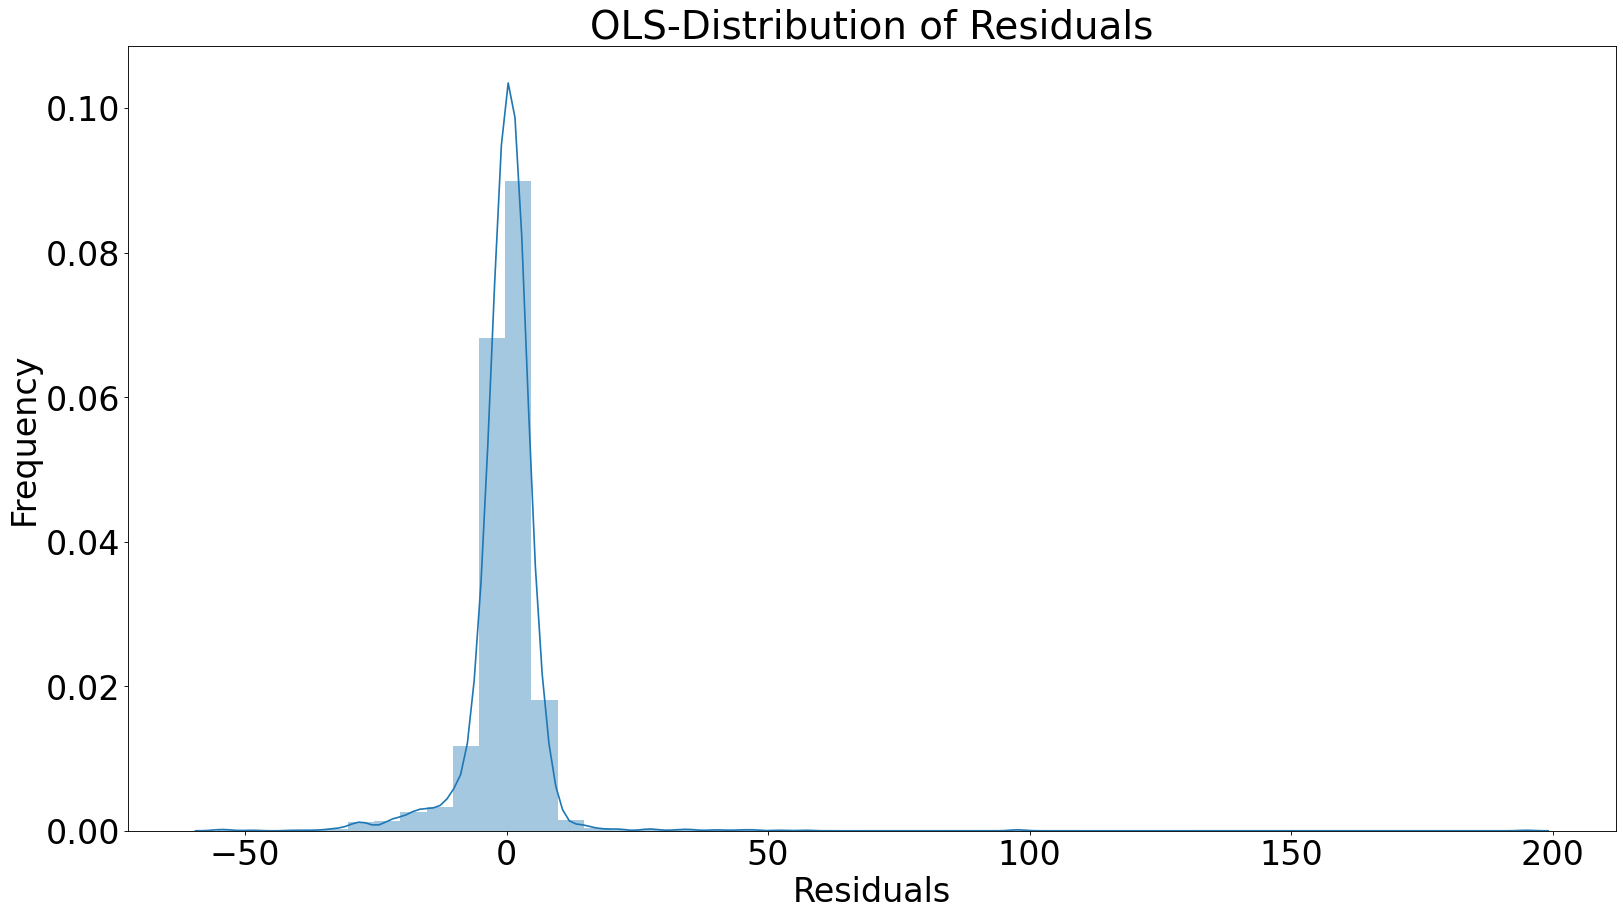

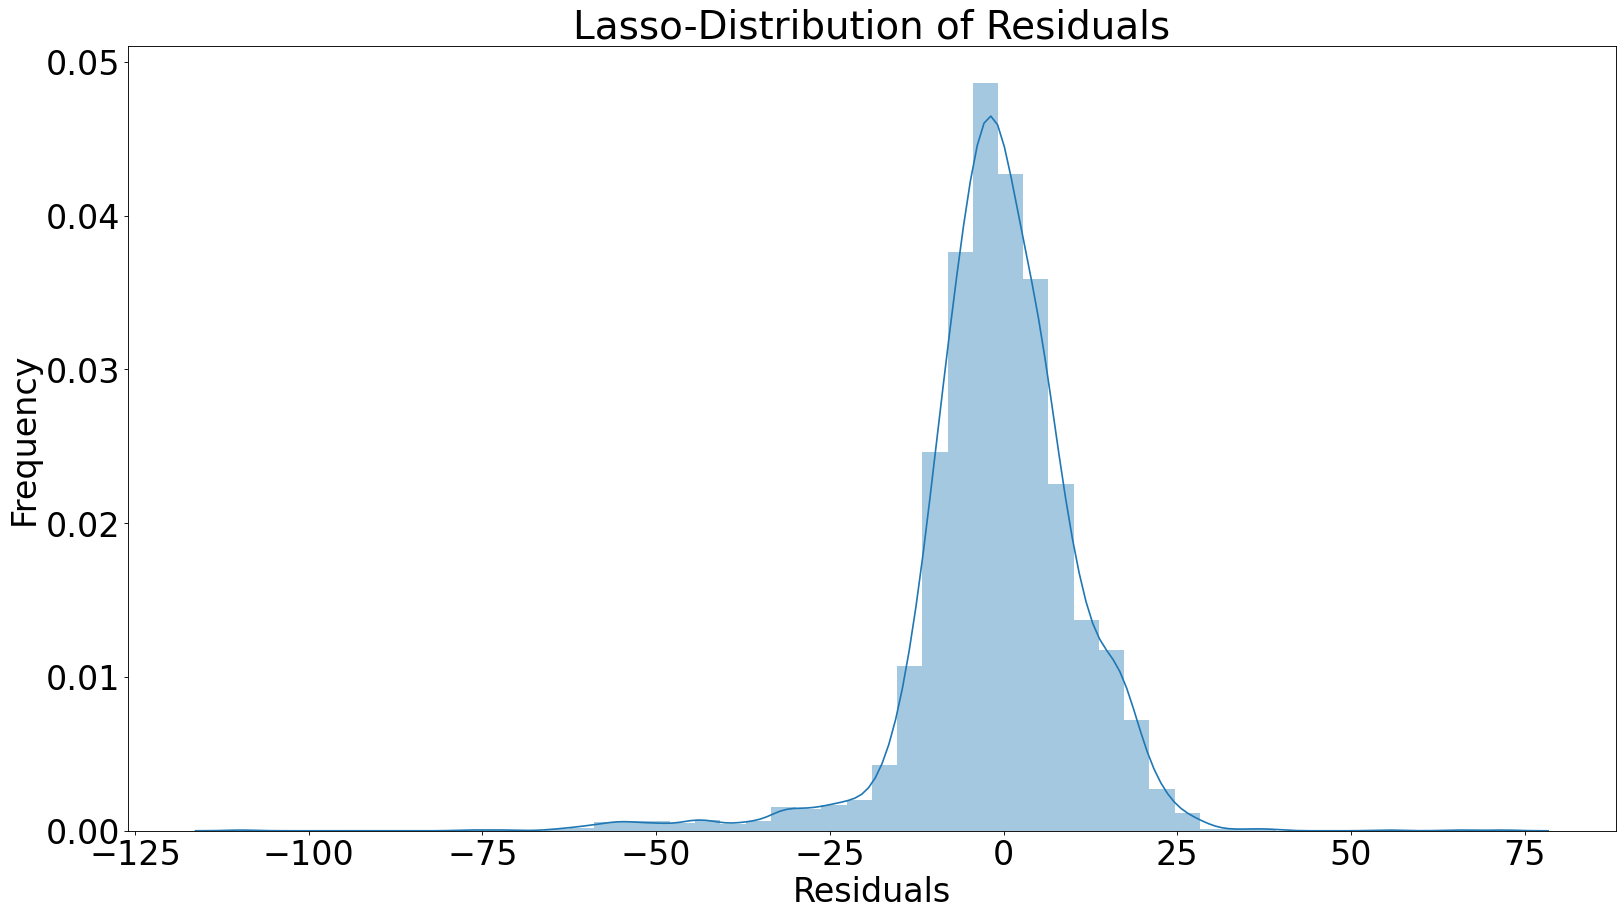

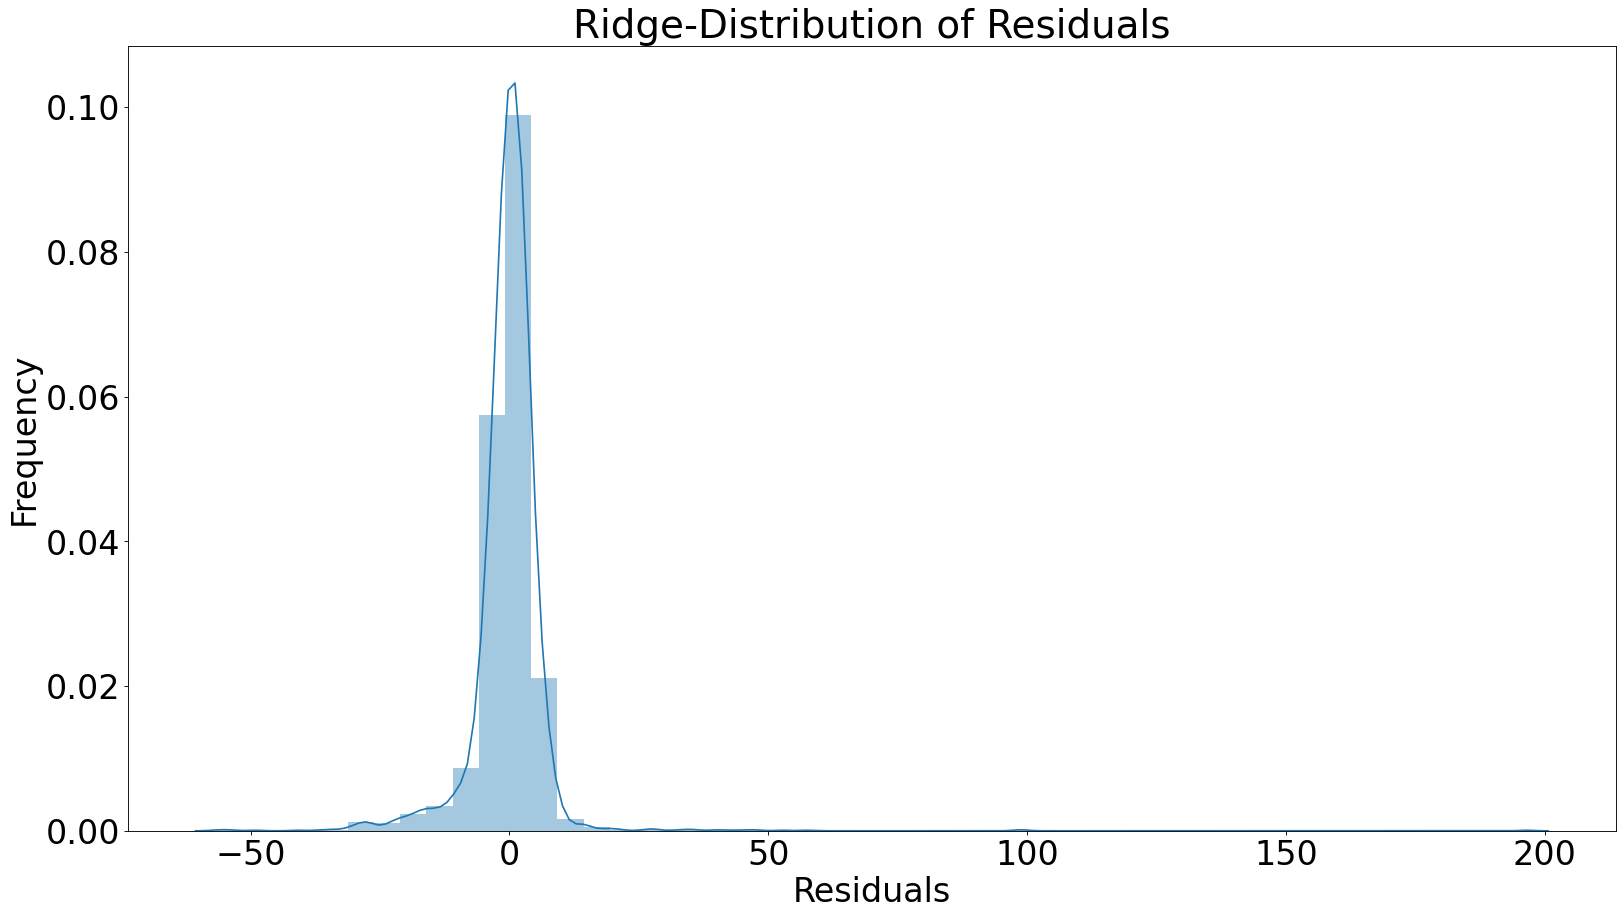

In [ ]:
def normal_errors_assumption(model, features, label, p_value_thresh , titulo2):
    """
    Normality: Assumes that the error terms are normally distributed. If they are not,
    nonlinear transformations of variables may solve this.
               
    This assumption being violated primarily causes issues with the confidence intervals
    """
    from statsmodels.stats.diagnostic import normal_ad
    #print('Supuesto 2: los términos de error se distribuyen normalmente', '\n')

    # Calculating residuals for the Anderson-Darling test
    df_results = calculate_residuals(model, features, label)
    
    #print('Usando la prueba Anderson-Darling para distribución normal')

    # Performing the test on the residuals
    p_value = normal_ad(df_results['Residuals'])[1]
    #print('Valor p de la prueba: por debajo de 0.05 generalmente significa no normal:', p_value)
    
    # Reporting the normality of the residuals
    if p_value < p_value_thresh:
        print('Los residuos no se distribuyen normalmente: ', titulo2)
    else:
        print('Los residuos se distribuyen normalmente ', titulo2)
    
    # Plotting the residuals distribution
    plt.subplots(figsize=(24, 13), dpi=80)
    plt.title(titulo2, size=35)
    plt.rc('xtick', labelsize=30) 
    plt.rc('xtick', labelsize=30)
    sns.distplot(df_results['Residuals'])
    plt.xlabel("Residuals", fontsize=30)
    #plt.xlabel("Residuos", fontsize=30)
    plt.ylabel("Frequency", fontsize=30)
    #plt.ylabel("Frecuencia", fontsize=30)
    #plt.show()
    titulo2_img="/content/drive/Othercomputers/Mi Portátil/Papers/Panel Solar - Ing. Saul/Paneles Nuevos 2021/CC-CC/RFE-"+titulo2+".png"
    plt.savefig(titulo2_img, bbox_inches='tight')
    
    # print()
    # if p_value > p_value_thresh:
    #     print('Assumption satisfied')
    # else:
    #     print('Assumption not satisfied')
    #     print()
    #     print('Confidence intervals will likely be affected')
    #     print('Try performing nonlinear transformations on variables')

normal_errors_assumption(reg, X_train, y_train,0.05 , "Bayesiano-Distribution of Residuals")
#normal_errors_assumption(reg, X_train, y_train,0.05 , "Bayesiano-Distribución de Residuos")
time.sleep(1)
normal_errors_assumption(regr, X_train, y_train,0.05 , "OLS-Distribution of Residuals")
#normal_errors_assumption(regr, X_train, y_train,0.05 , "OLS-Distribución de Residuos")
time.sleep(1)
normal_errors_assumption(regr2, X_train, y_train,0.05 , "Lasso-Distribution of Residuals")
#normal_errors_assumption(regr2, X_train, y_train,0.05 , "Lasso-Distribución de Residuos")
time.sleep(1)
normal_errors_assumption(regr3, X_train, y_train,0.05 , "Ridge-Distribution of Residuals")
#normal_errors_assumption(regr3, X_train, y_train,0.05 , "Ridge-Distribución de Residuos")

###Correlation

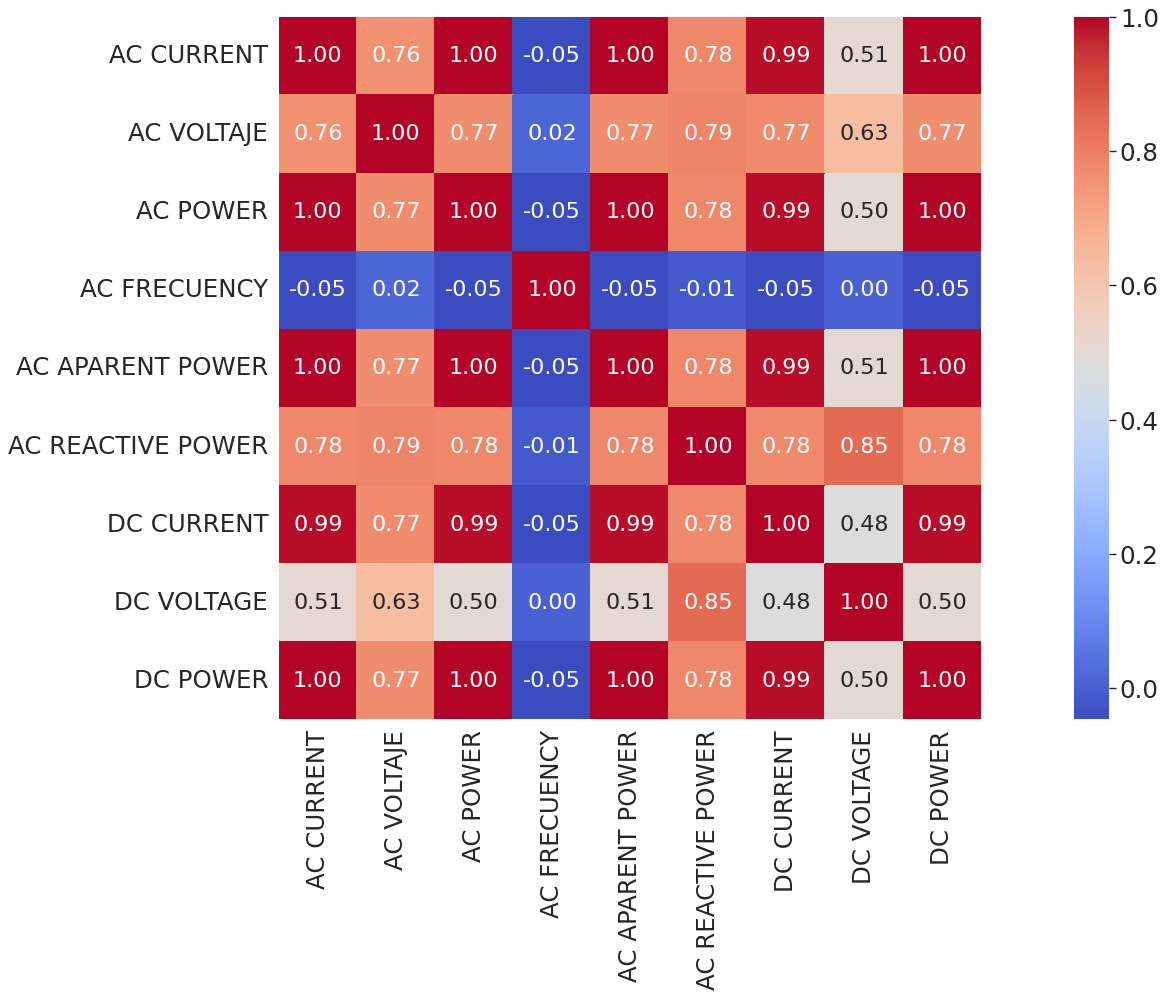

In [ ]:
cols = ['AC CURRENT',	'AC VOLTAJE', 'AC POWER',
        'AC FRECUENCY',	'AC APARENT POWER', 'AC REACTIVE POWER',
        'DC CURRENT', 'DC VOLTAGE','DC POWER']
from sklearn.preprocessing import StandardScaler 
stdsc = StandardScaler() 
X_std = stdsc.fit_transform(df.iloc[:,range(0,9)].values)
cov_mat =np.cov(X_std.T)
plt.figure(figsize=(24, 13), dpi=80)
sns.set(font_scale=2)
hm = sns.heatmap(cov_mat,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 20},
                 cmap='coolwarm',                 
                 yticklabels=cols,
                 xticklabels=cols)
#plt.title('Covariance matrix showing correlation coefficients', size = 24)
plt.tight_layout()
#plt.show()
titulo3_img="/content/drive/Othercomputers/Mi Portátil/Papers/Panel Solar - Ing. Saul/Paneles Nuevos 2021/CC-CC/RFE-Correlacion.png"
plt.savefig(titulo3_img, bbox_inches='tight')

###Autocorrelation

In [ ]:
print('Assumption 4: No Autocorrelation', '\n')
print('Performing Durbin-Watson Test')
print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
print('0 to 2< is positive autocorrelation')
print('>2 to 4 is negative autocorrelation')
print('-------------------------------------')

def autocorrelation_assumption(model, features, label, titulo3):
    """
    Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                     autocorrelation, then there is a pattern that is not explained due to
                     the current value being dependent on the previous value.
                     This may be resolved by adding a lag variable of either the dependent
                     variable or some of the predictors.
    """

    print("##############", titulo3 , "################")
    from statsmodels.stats.stattools import durbin_watson
    
    # Calculating residuals for the Durbin Watson-tests
    df_results = calculate_residuals(model, features, label)

    durbinWatson = durbin_watson(df_results['Residuals'])
    print('Durbin-Watson:', durbinWatson)
    if durbinWatson < 1.5:
        print('Signs of positive autocorrelation')
        print('Assumption not satisfied')
    elif durbinWatson > 2.5:
        print('Signs of negative autocorrelation')
        print('Assumption not satisfied')
    else:
        print('Little to no autocorrelation')
        print('Assumption satisfied')

autocorrelation_assumption(reg, X_train, y_train, "Bayesiano-autocorrelation")
time.sleep(1)
autocorrelation_assumption(regr, X_train, y_train, "OLS-autocorrelation")
time.sleep(1)
autocorrelation_assumption(regr2, X_train, y_train, "Lasso-autocorrelation")
time.sleep(1)
autocorrelation_assumption(regr3, X_train, y_train, "Ridge-autocorrelation")

Assumption 4: No Autocorrelation 

Performing Durbin-Watson Test
Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data
0 to 2< is positive autocorrelation
>2 to 4 is negative autocorrelation
-------------------------------------
############## Bayesiano-autocorrelation ################
Durbin-Watson: 2.0152313684055465
Little to no autocorrelation
Assumption satisfied
############## OLS-autocorrelation ################
Durbin-Watson: 2.015271393109451
Little to no autocorrelation
Assumption satisfied
############## Lasso-autocorrelation ################
Durbin-Watson: 2.0024625339979045
Little to no autocorrelation
Assumption satisfied
############## Ridge-autocorrelation ################
Durbin-Watson: 2.015054232107167
Little to no autocorrelation
Assumption satisfied


###Homoscedasticity

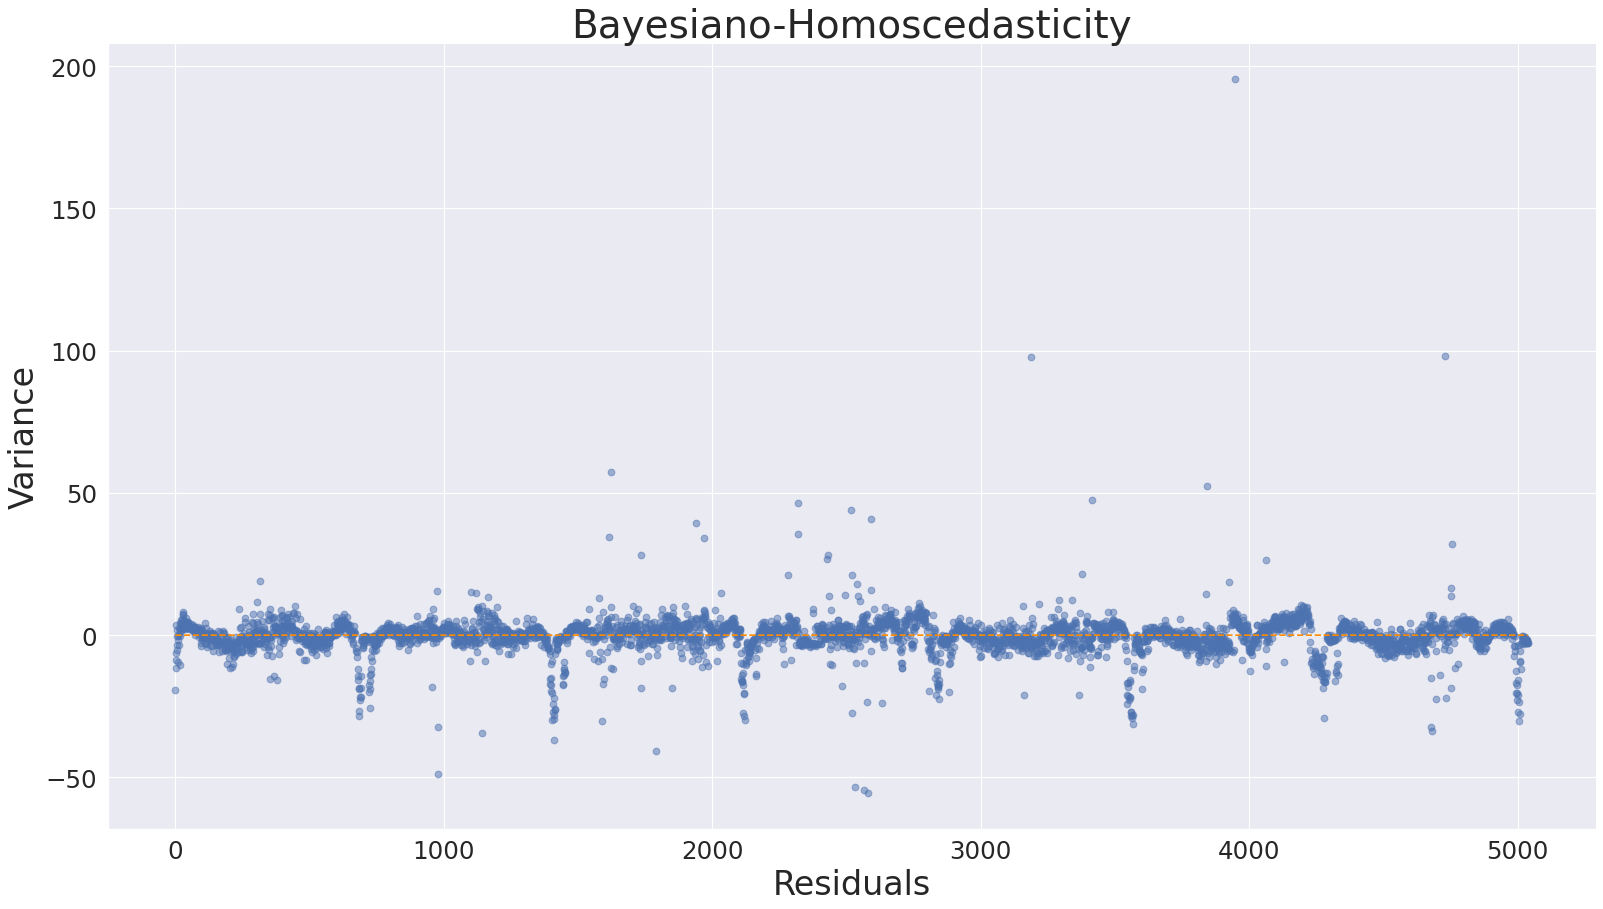

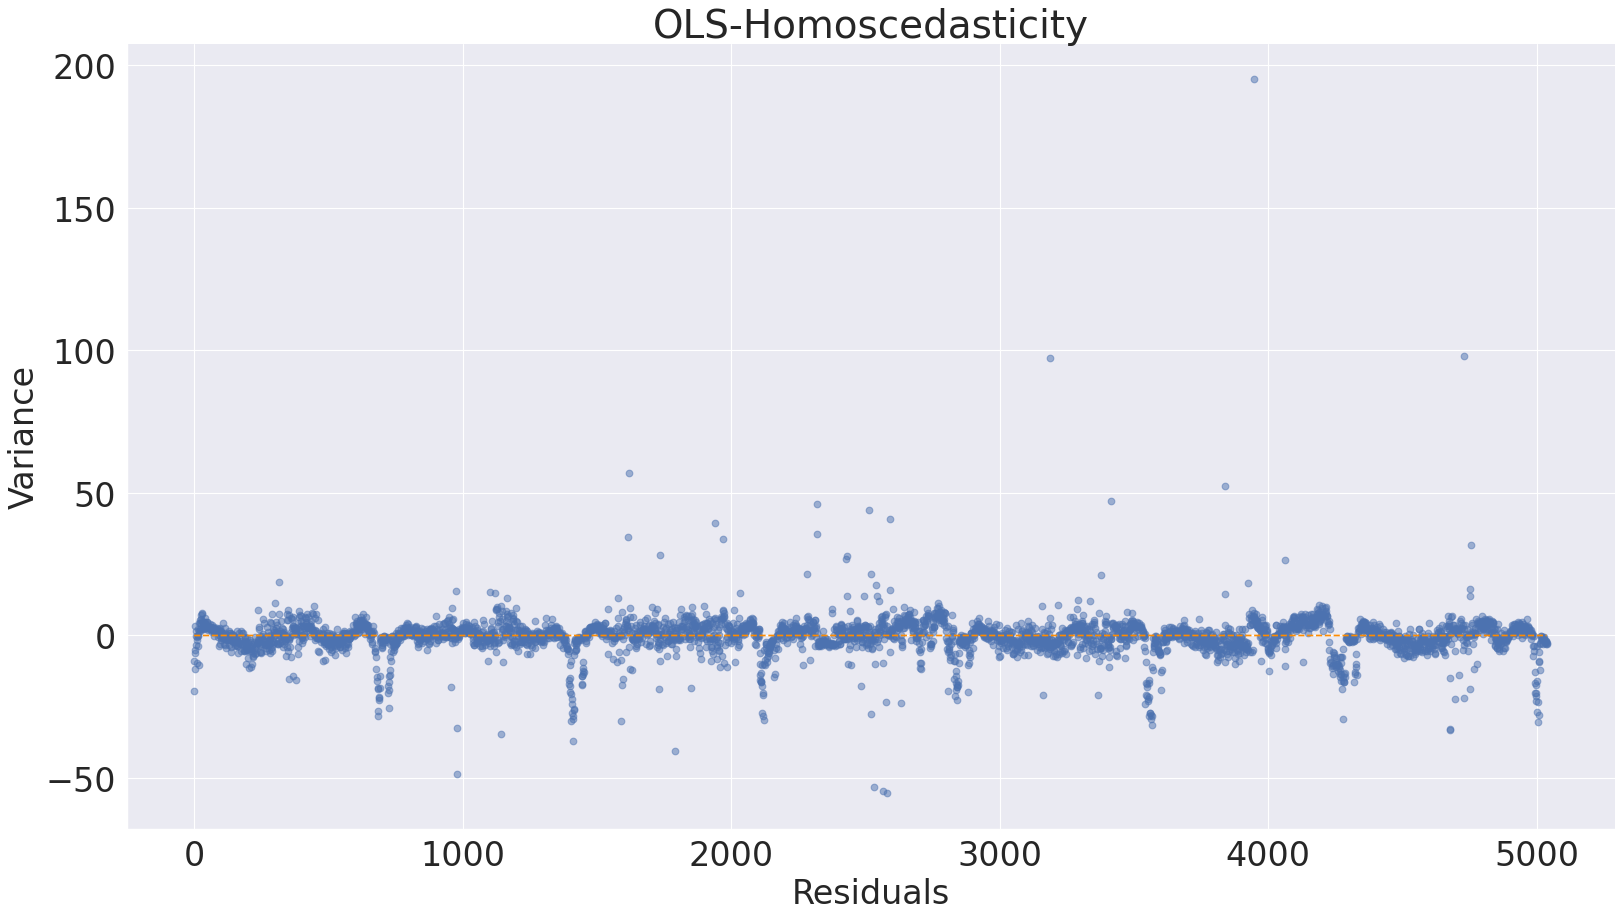

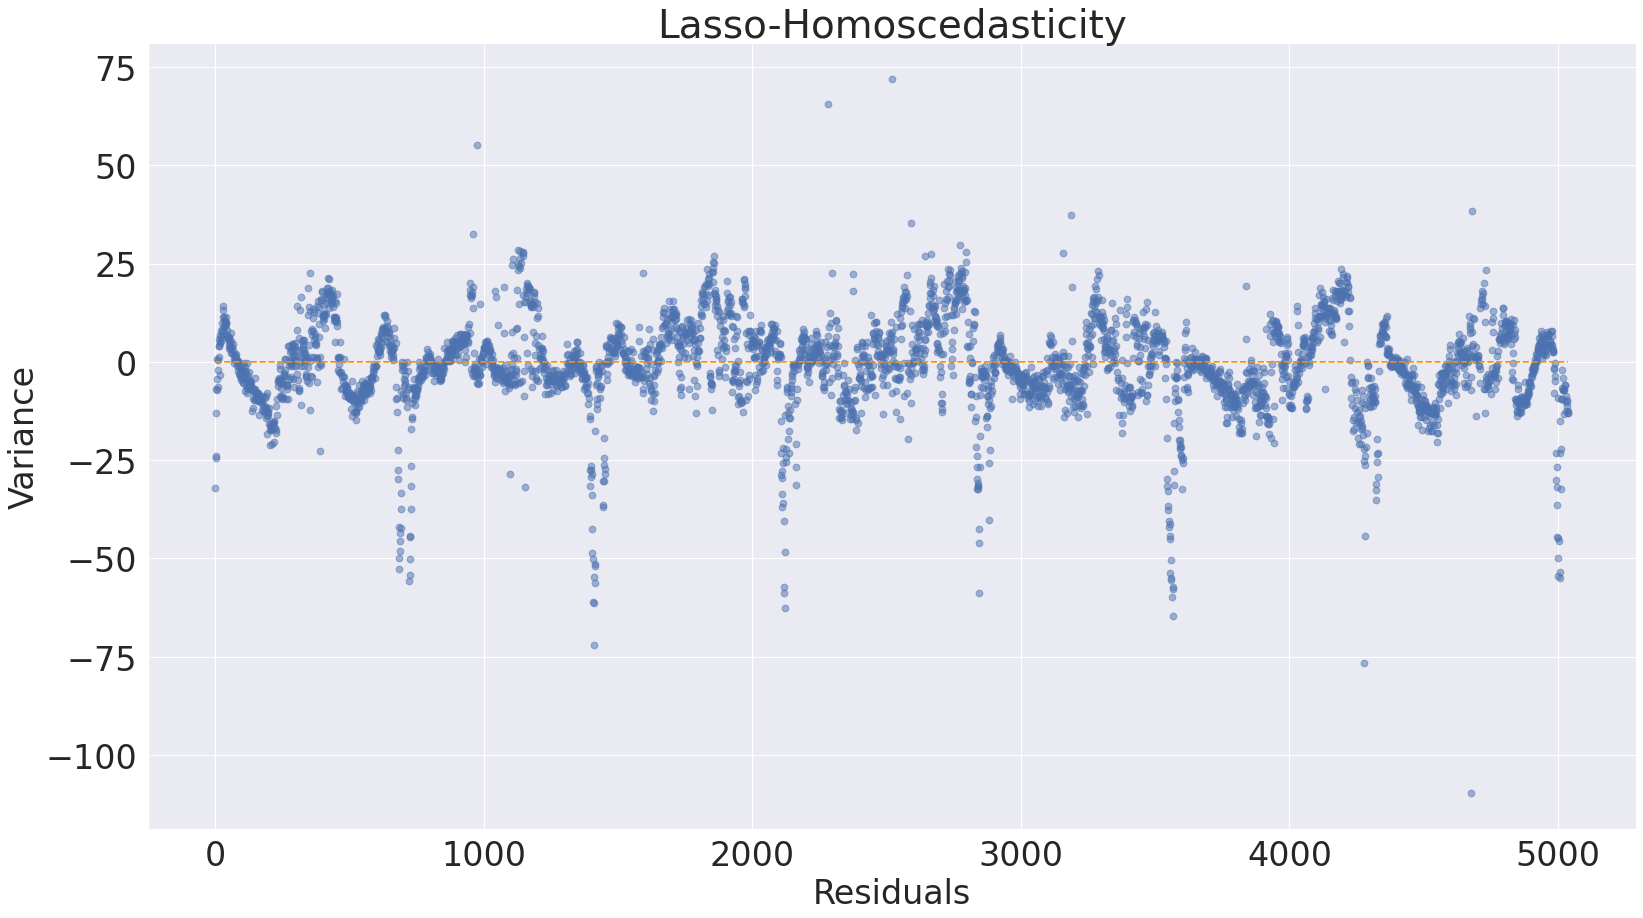

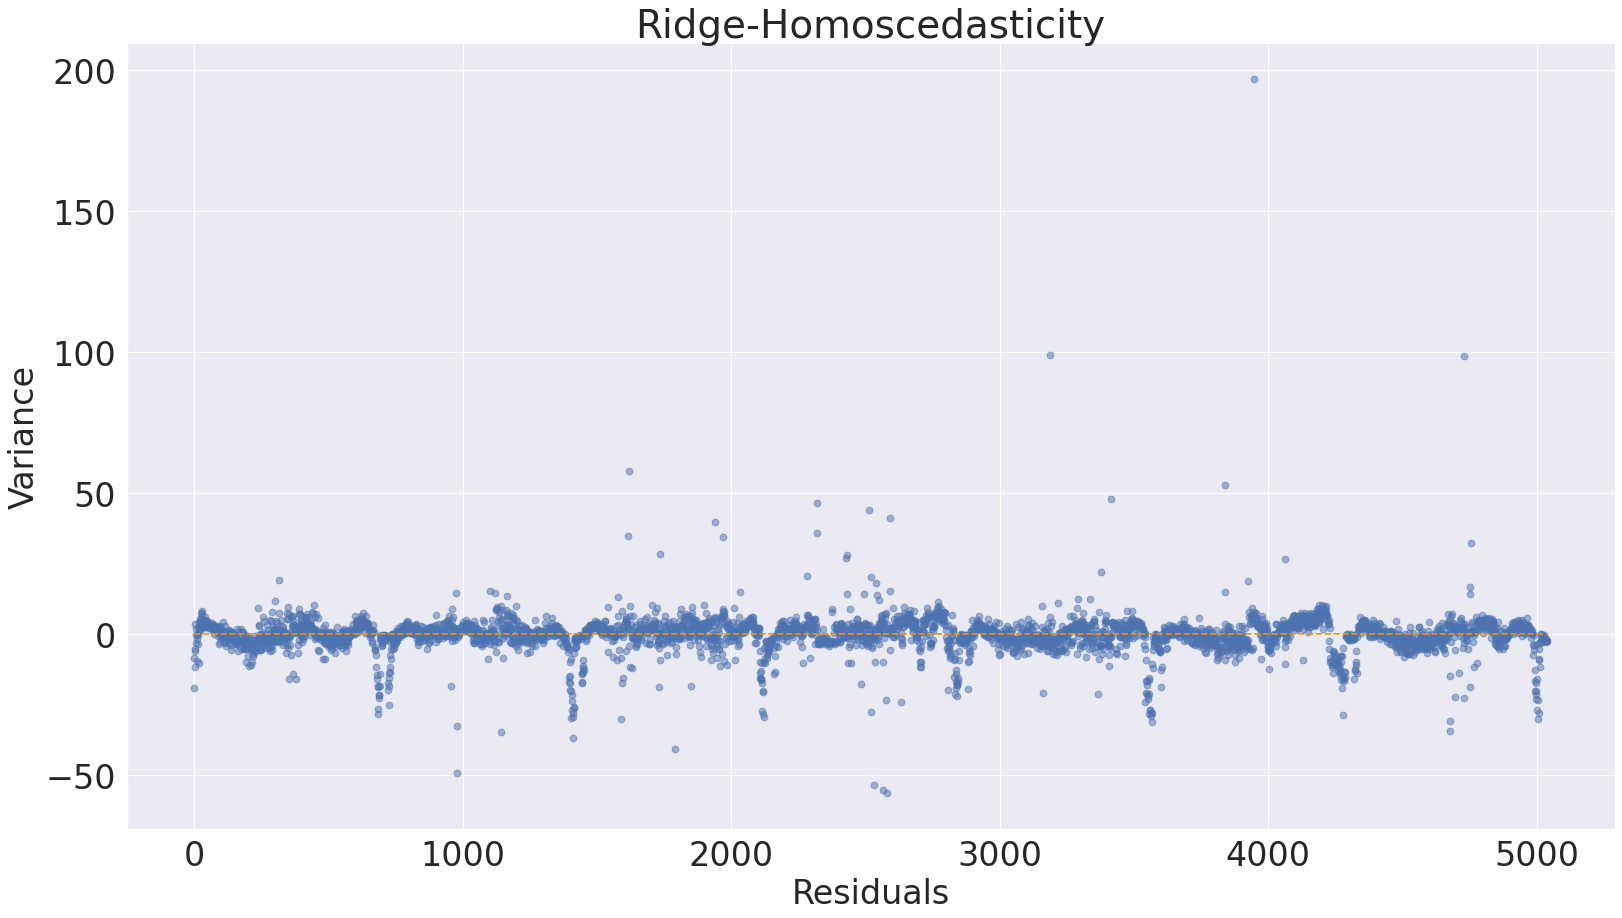

In [ ]:
####################### Homocedasticidad #######################
def homoscedasticity_assumption(model, features, label, titulo4):
    """
    Homoscedasticity: Assumes that the errors exhibit constant variance
    """
    # print('Assumption 5: Homoscedasticity of Error Terms', '\n')
    
    # print('Residuals should have relative constant variance')
        
    # Calculating residuals for the plot
    df_results = calculate_residuals(model, features, label)

    # Plotting the residuals
    plt.subplots(figsize=(24, 13), dpi=80)
    ax = plt.subplot(111)  # To remove spines
    plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5)
    plt.plot(np.repeat(0, df_results.index.max()), color='darkorange', linestyle='--')
    ax.spines['right'].set_visible(False)  # Removing the right spine
    ax.spines['top'].set_visible(False)  # Removing the top spine
    plt.rc('xtick', labelsize=30)
    plt.rc('ytick', labelsize=30)
    plt.xlabel("Residuals", fontsize=30)
    #plt.xlabel("Residuos", fontsize=30)
    plt.ylabel("Variance", fontsize=30)
    #plt.ylabel("Varianza", fontsize=30)
    plt.title(titulo4, size=35)
    #plt.show()
    titulo4_img="/content/drive/Othercomputers/Mi Portátil/Papers/Panel Solar - Ing. Saul/Paneles Nuevos 2021/CC-CC/RFE-"+titulo4+".png"
    plt.savefig(titulo4_img, bbox_inches='tight')

homoscedasticity_assumption(reg, X_train, y_train, "Bayesiano-Homoscedasticity")
#homoscedasticity_assumption(reg, X_train, y_train, "Bayesiano-Homocedasticidad")
time.sleep(1)
homoscedasticity_assumption(regr, X_train, y_train, "OLS-Homoscedasticity")
#homoscedasticity_assumption(regr, X_train, y_train, "OLS-Homocedasticidad")
time.sleep(1)
homoscedasticity_assumption(regr2, X_train, y_train, "Lasso-Homoscedasticity")
#homoscedasticity_assumption(regr2, X_train, y_train, "Lasso-Homocedasticidad")
time.sleep(1)
homoscedasticity_assumption(regr3, X_train, y_train, "Ridge-Homoscedasticity")
#homoscedasticity_assumption(regr3, X_train, y_train, "Ridge-Homocedasticidad")

###Time Train - Test

In [ ]:
from datetime import datetime

#Defino el algoritmo a utilizar
reg = linear_model.BayesianRidge()
regr = linear_model.LinearRegression()
regr2 = linear_model.Lasso(max_iter=10000, alpha=0.01)
regr3 = linear_model.Ridge(alpha=0.010)
#Entreno el modelo

inicialBayesiano = datetime.now()
reg.fit(X_train, y_train)
finalBayesiano = datetime.now()
tiempoBayesiano = finalBayesiano - inicialBayesiano # Devuelve un objeto timedelta
print ("El tiempo de entranmiento-Bayesiano es: ",tiempoBayesiano)

inicialOLS = datetime.now()
regr.fit(X_train, y_train)
finalOLS = datetime.now()
tiempoOLS = finalOLS - inicialOLS # Devuelve un objeto timedelta
print ("El tiempo de entranmiento-OLS es: ",tiempoOLS)

inicialLasso = datetime.now()
regr2.fit(X_train, y_train)
finalLasso = datetime.now()
tiempoLasso = finalLasso - inicialLasso # Devuelve un objeto timedelta
print ("El tiempo de entranmiento-Lasso es: ",tiempoLasso)

inicialRidge = datetime.now()
regr3.fit(X_train, y_train)
finalRidge = datetime.now()
tiempoRidge = finalRidge - inicialRidge # Devuelve un objeto timedelta
print ("El tiempo de entranmiento-Ridge es: ",tiempoRidge)
#############################################################
pred_inicialBayesiano = datetime.now()
Y_pred_Bayesiano = reg.predict(X_test)
pred_finalBayesiano = datetime.now()
pred_tiempoBayesiano = pred_finalBayesiano - pred_inicialBayesiano # Devuelve un objeto timedelta
print ("El tiempo de test-Bayesiano es: ",pred_tiempoBayesiano)

pred_inicialOLS = datetime.now()
Y_pred_OLS = regr.predict(X_test)
pred_finalOLS = datetime.now()
pred_tiempoOLS = pred_finalOLS - pred_inicialOLS # Devuelve un objeto timedelta
print ("El tiempo de test-OLS es: ",pred_tiempoOLS)

pred_inicialLasso = datetime.now()
Y_pred_Lasso = regr2.predict(X_test)
pred_finalLasso = datetime.now()
pred_tiempoLasso = pred_finalLasso - pred_inicialLasso # Devuelve un objeto timedelta
print ("El tiempo de test-Lasso es: ",pred_tiempoLasso)

pred_inicialRidge = datetime.now()
Y_pred_Ridge = regr3.predict(X_test)
pred_finalRidge = datetime.now()
pred_tiempoRidge = pred_finalRidge - pred_inicialRidge # Devuelve un objeto timedelta
print ("El tiempo de test-Ridge es: ",pred_tiempoRidge)

El tiempo de entranmiento-Bayesiano es:  0:00:00.003646
El tiempo de entranmiento-OLS es:  0:00:00.002310
El tiempo de entranmiento-Lasso es:  0:00:00.277980
El tiempo de entranmiento-Ridge es:  0:00:00.002393
El tiempo de test-Bayesiano es:  0:00:00.001099
El tiempo de test-OLS es:  0:00:00.000988
El tiempo de test-Lasso es:  0:00:00.000994
El tiempo de test-Ridge es:  0:00:00.000944
